In [191]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this assignment, we need to use S&P Case-Schiller Home Price Index as a proxy for home prices and identify key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.

Output feature:
**Home Price Index(Index Jan 2000=100):** Since we had to use S&P Case-Schiller Home Price Index as a proxy for home prices. I've downloaded the monthly data of last 20 years from 2003-04-01 to 2023-04-01(considering the data availability of other features) as a CSV file and renamed it:"HPI(Apr2003-Apr2023).csv" and taken it directly as House Price Index, which is our output in this model.

In [192]:
df1=pd.read_csv('HPI(Apr2003-Apr2023).csv')
df1.head()

,Month,House Price Index
0,2003-04-01,130.884
1,2003-05-01,131.734
2,2003-06-01,132.649
3,2003-07-01,133.777
4,2003-08-01,134.969


Input features:
**1.Population(In thousands):** Population growth reflects the demand and supply of housing in a given market. Population growth can also affect the income, preferences, and needs of consumers for housing. So, I've  considered this as a factor. I've downloaded the monthly population data of last 20 years from 2003-04-01 to 2023-04-01 as a CSV file and renamed it:'Population(Apr2003-Apr2023).csv'

In [193]:
df2=pd.read_csv('Population(Apr2003-Apr2023).csv')
df2.head()

,Month,Population
0,2003-04-01,290024.0
1,2003-05-01,290250.0
2,2003-06-01,290484.0
3,2003-07-01,290726.0
4,2003-08-01,290974.0


**2.GDP(In Billions of Dollars):** Gross Domestic Product is a measure of the total value of goods and services produced in a country. It reflects the economic activity and growth of a country. A higher GDP indicates a stronger economy, which may increase the income and purchasing power of consumers, and thus increase the demand and price of housing.That's why I've considered it a factor. I've downloaded a CSV file and have named it 'GDP(Apr2003-Apr2023).csv' which contains quarterly data. Here, I've converted these quarterly data into monthly data with the same value for each month in respective quarters.

In [194]:
df3=pd.read_csv('GDP(Apr2003-Apr2023).csv')
df3['Month'] = pd.to_datetime(df3['Month'])
df3.set_index('Month', inplace=True)
df3 = df3.resample('M').ffill()
df3.reset_index(inplace=True)
df3['Month'] = df3['Month'].dt.strftime('%Y-%m-01')
df3.head()

,Month,GDP
0,2003-04-01,11312.766
1,2003-05-01,11312.766
2,2003-06-01,11312.766
3,2003-07-01,11566.669
4,2003-08-01,11566.669


**3.Unemployment Rate(In Percent):** The Unemployment Rate represents the percentage of people actively seeking employment but currently jobless, serving as an economic health indicator. A high Unemployment Rate often lowers consumer confidence, reducing demand for housing and impacting prices. That's why I've considered it as a factor.I've downloaded the monthly Unemployment Rate data of last 20 years from 2003-04-01 to 2023-04-01 as a CSV file and renamed it:'Population(Apr2003-Apr2023).csv'

In [195]:
df4=pd.read_csv('UnemploymentRate(Apr2003-Apr2023).csv')
df4.head()

,Month,Unemployment Rate
0,2003-04-01,5.4
1,2003-05-01,5.5
2,2003-06-01,5.6
3,2003-07-01,5.5
4,2003-08-01,5.5


**4.Mortgage Rate(In Percent):** Mortgage rate is the interest rate charged by lenders to borrowers for home loans. It affects the affordability and availability of credit for home buyers. A lower mortgage rate reduces the cost of borrowing, which may stimulate the demand and price of housing. That's why I've considered it as a factor. I've downloaded a CSV file and have named it 'Mortgagerate(Apr2003-Apr2023).csv' which contains weekly data for each month. Here, I've aggregated the weekly data into monthly data with the help of mean.

In [196]:
df5=pd.read_csv('Mortgagerate(Apr2003-Apr2023).csv')
df5['Month'] = pd.to_datetime(df5['Month'])
df5.set_index('Month', inplace=True)
df5 = df5.resample('M').mean()
df5.reset_index(inplace=True)
df5['Month'] = df5['Month'].dt.strftime('%Y-%m-01')
df5.head()

,Month,Mortgage Rate
0,2003-04-01,5.8125
1,2003-05-01,5.4840
2,2003-06-01,5.2300
3,2003-07-01,5.6325
4,2003-08-01,6.2640


**5.Consumer Price Index(CPI-U all items 1982-1984=100, seasonally adjusted):** One of the most common measures of inflation is the Consumer Price Index (CPI), which is produced by the Bureau of Labor Statistics (BLS).The CPI shows changes in the prices paid by urban consumers for a representative basket of goods and services, such as food, energy, clothing, **housing**, etc. I've used CPI as a factor and not CPPI(Commercial Property Price Index is a measure of the changes in prices of commercial real estate properties) because CPPI is not as widely available and updated as CPI, which is produced by the Bureau of Labor Statistics (BLS) every month. I've downloaded the data of CPI as a CSV file and named it:"CompleteCPI.csv",which contains monthly data as Period with their years separately.Here, I've created a dictionary:'month_dict' to map month names to their numerical representation, and obtained monthly data from 2003-04-01 to 2023-04-01,by converting the year and month into this format.  

In [197]:
df6=pd.read_csv('CompleteCPI.csv')
#Creating a dictionary to map month names to their numerical representation
month_dict = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}
df6["Month"] = df6["Year"].astype(str) + "-" + df6["Period"].map(month_dict) + "-01"
df6["Month"] = pd.to_datetime(df6["Month"])

#Filtering the data for the date range (2003-04-01 to 2023-04-01)
start_date = pd.to_datetime("2003-04-01")
end_date = pd.to_datetime("2023-04-01")
df6 = df6[(df6["Month"] >= start_date) & (df6["Month"] <= end_date)]
df6 = df6[["Month", "Consumer Price Index"]]
#Reversing the DataFrame and resetting the index
df6 = df6[::-1].reset_index(drop=True)
df6.head()

,Month,Consumer Price Index
0,2003-04-01,183.2
1,2003-05-01,182.9
2,2003-06-01,183.1
3,2003-07-01,183.7
4,2003-08-01,184.5


**6.Housing Credit Availability Index(In Percent):** Housing Credit Availability Index is a measure of the percentage of home purchase loans that are likely to default. It reflects the risk appetite and lending standards of lenders. A higher HCAI indicates that lenders are willing to offer more credit to borrowers, which may increase the supply and price of housing.That's why I've considered it a factor.I've downloaded the HCAI data as an excel file and named it:'HCAI_Chart.xlsx',which now contains only Total Risk(%)(sum of Borrower Risk & Product Risk) of whole market with Quarter and Year separately. Earlier this excel file had 4 workbooks consisting of Whole market, GSE(Government Sponsored Enterprise),Govt., and PP(Portfolio and Private), but I removed other workbooks and considered only **Whole market** data because it's a combination of all the other categories, representing the entire market of home purchase loans.This category reflects the overall credit availability and riskiness of the mortgage market. Then, I removed unwanted columns in this excel workbook and left it with only 'Year','Quarter' and renamed 'Total Risk' column as 'Housing Credit Availability Index'.Here, I've created a dictionary:'quarter_to_months' to map quarter numbers to their corresponding months, and obtained monthly HCAI data, with each month in 'YYYY-MM-01' format.

In [198]:
df7=pd.read_excel('HCAI_Chart.xlsx')
#Creating a dictionary to map quarter numbers to their corresponding months
quarter_to_months = {
    1: [1, 2, 3],
    2: [4, 5, 6],
    3: [7, 8, 9],
    4: [10, 11, 12]
}
#Expanding the DataFrame to represent months
df7['Month'] = df7['Quarter'].map(quarter_to_months)
df7 = df7.explode('Month')

#Creating the "Month" column with the 1st day of the month in the format YYYY-MM-01
df7['Month'] = df7['Year'].astype(str) + '-' + df7['Month'].astype(str).str.zfill(2) + '-01'

# Convert the "Month" column to datetime format
df7['Month'] = pd.to_datetime(df7['Month'])

#Resetting the index and selecting the "Month" and "Housing Credit Availability Index" columns
df7 = df7.reset_index(drop=True)[["Month", "Housing Credit Availability Index"]]
#Reordering the DataFrame to start from 2003-04-01 and end on 2023-04-01
start_date = pd.to_datetime("2003-04-01")
end_date = pd.to_datetime("2023-04-01")
df7 = df7[(df7['Month'] >= start_date) & (df7['Month'] <= end_date)]

#Again Resetting the index to start from 0
df7.reset_index(drop=True, inplace=True)
df7.head()

,Month,Housing Credit Availability Index
0,2003-04-01,12.203949
1,2003-05-01,12.203949
2,2003-06-01,12.203949
3,2003-07-01,12.130867
4,2003-08-01,12.130867


In [199]:
#Concatenating dataframes vertically
df = pd.concat([df2, df3, df4, df5, df6, df7, df1], axis=1)

#Dropping the duplicated "Month" columns due concatenation
df = df.loc[:, ~df.columns.duplicated()]


#Reordering the columns with House Price Index at the end
df = df[['Month', 'Population', 'GDP','Unemployment Rate','Mortgage Rate' ,
         'Consumer Price Index', 'Housing Credit Availability Index', 'House Price Index']]

In [200]:
df.head()

,Month,Population,GDP,Unemployment Rate,Mortgage Rate,Consumer Price Index,Housing Credit Availability Index,House Price Index
0,2003-04-01,290024.0,11312.766,5.4,5.8125,183.2,12.203949,130.884
1,2003-05-01,290250.0,11312.766,5.5,5.4840,182.9,12.203949,131.734
2,2003-06-01,290484.0,11312.766,5.6,5.2300,183.1,12.203949,132.649
3,2003-07-01,290726.0,11566.669,5.5,5.6325,183.7,12.130867,133.777
4,2003-08-01,290974.0,11566.669,5.5,6.2640,184.5,12.130867,134.969


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Month                              241 non-null    object 
 1   Population                         241 non-null    float64
 2   GDP                                241 non-null    float64
 3   Unemployment Rate                  241 non-null    float64
 4   Mortgage Rate                      241 non-null    float64
 5   Consumer Price Index               241 non-null    float64
 6   Housing Credit Availability Index  241 non-null    float64
 7   House Price Index                  241 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.2+ KB


In [202]:
df.set_index('Month',inplace=True)

In [203]:
df.head()

,Population,GDP,Unemployment Rate,Mortgage Rate,Consumer Price Index,Housing Credit Availability Index,House Price Index
Month,,,,,,,
2003-04-01,290024.0,11312.766,5.4,5.8125,183.2,12.203949,130.884
2003-05-01,290250.0,11312.766,5.5,5.4840,182.9,12.203949,131.734
2003-06-01,290484.0,11312.766,5.6,5.2300,183.1,12.203949,132.649
2003-07-01,290726.0,11566.669,5.5,5.6325,183.7,12.130867,133.777
2003-08-01,290974.0,11566.669,5.5,6.2640,184.5,12.130867,134.969


In [204]:
df.describe()

,Population,GDP,Unemployment Rate,Mortgage Rate,Consumer Price Index,Housing Credit Availability Index,House Price Index
count,241.000000,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000
mean,315461.800830,17495.015502,5.481743,4.69645,231.766805,7.936829,183.248614
std,13624.981944,3933.247856,1.975432,1.12140,28.398130,3.846084,43.425398
min,290024.000000,11312.766000,3.200000,2.68400,182.900000,4.660502,130.884000
25%,303926.000000,14564.117000,4.000000,3.80250,212.600000,5.315952,148.410000
50%,316535.000000,16728.687000,4.800000,4.45750,232.300000,6.254727,173.828000
75%,328364.000000,20328.553000,6.700000,5.75800,250.000000,7.527790,200.654000
max,334880.000000,27063.012000,14.200000,6.90000,302.900000,16.943255,304.832000


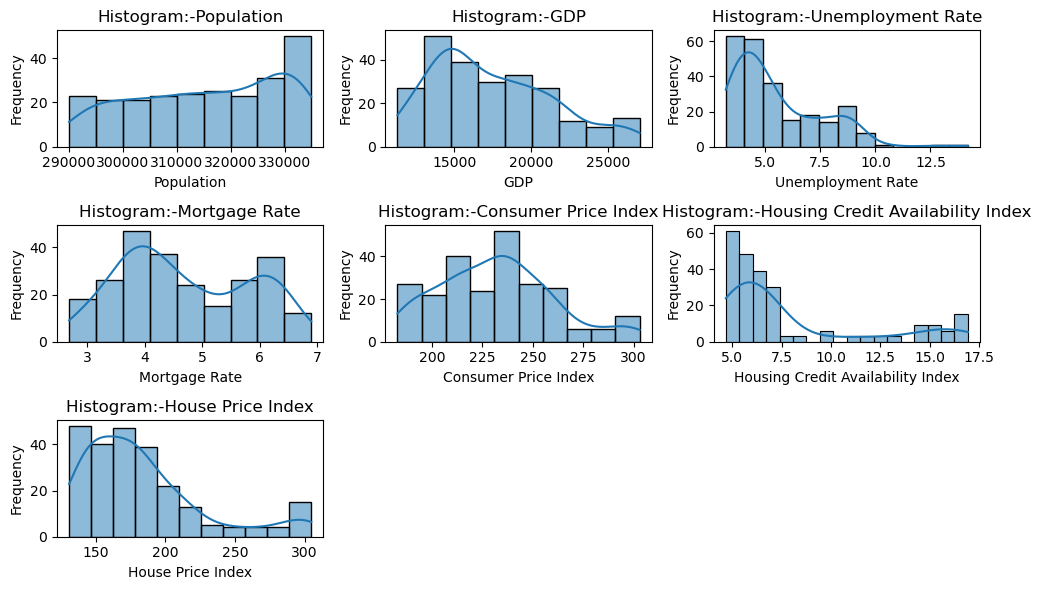

In [205]:
features = ['Population', 'GDP', 'Unemployment Rate','Mortgage Rate','Consumer Price Index', 'Housing Credit Availability Index', 'House Price Index']
num_rows, num_cols = 3, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, ax=axes[i],kde=True)
    axes[i].set_title(f'Histogram:-{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [206]:
df.corr()

,Population,GDP,Unemployment Rate,Mortgage Rate,Consumer Price Index,Housing Credit Availability Index,House Price Index
Population,1.000000,0.944911,-0.160531,-0.683783,0.952359,-0.823405,0.681669
GDP,0.944911,1.000000,-0.322011,-0.488334,0.987922,-0.697232,0.869668
Unemployment Rate,-0.160531,-0.322011,1.000000,-0.243149,-0.217630,-0.171765,-0.491279
Mortgage Rate,-0.683783,-0.488334,-0.243149,1.000000,-0.506296,0.670503,-0.123664
Consumer Price Index,0.952359,0.987922,-0.217630,-0.506296,1.000000,-0.763823,0.820934
Housing Credit Availability Index,-0.823405,-0.697232,-0.171765,0.670503,-0.763823,1.000000,-0.319431
House Price Index,0.681669,0.869668,-0.491279,-0.123664,0.820934,-0.319431,1.000000


<Axes: >

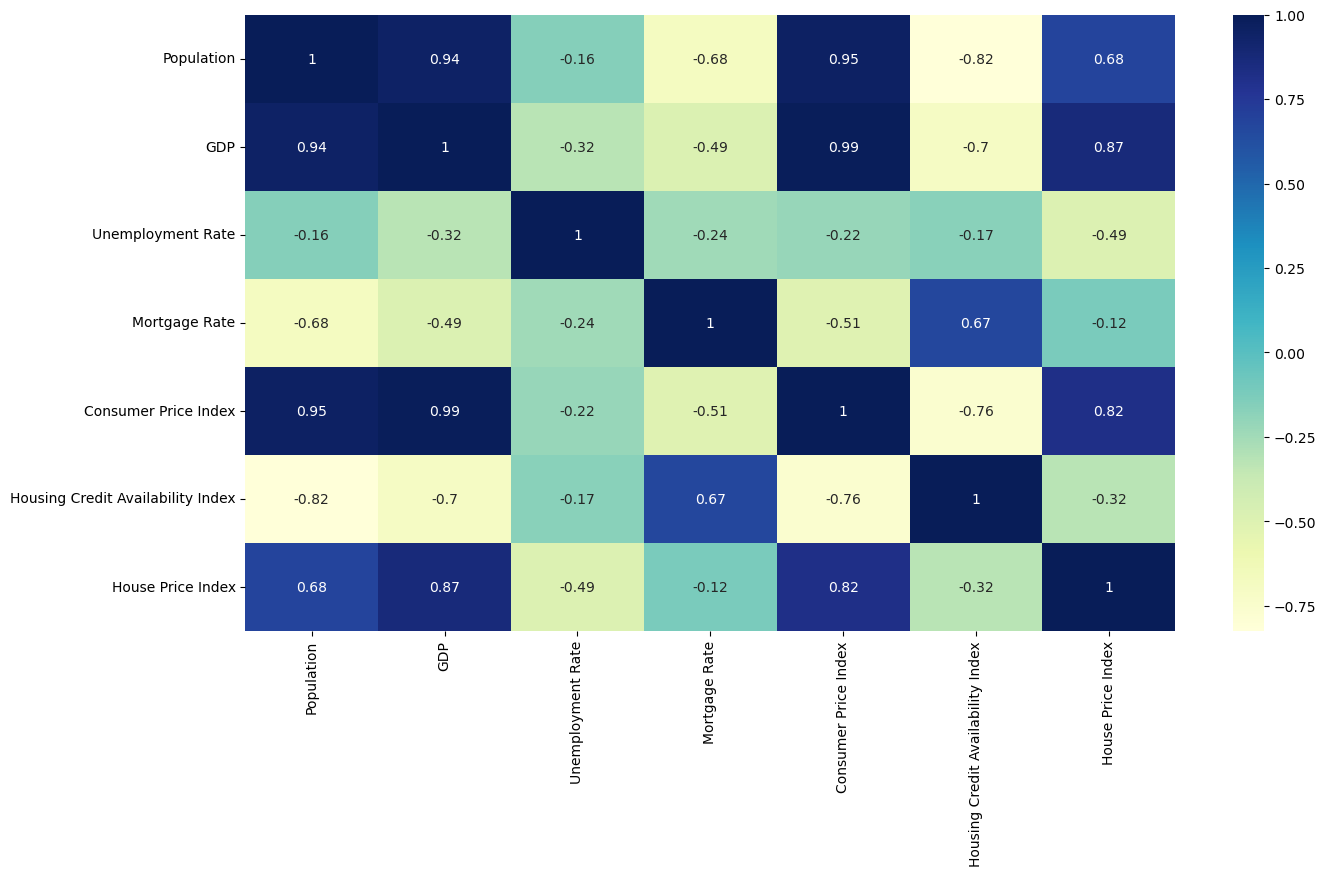

In [207]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

We'll be using **Random Forest regression**,in which the model makes predictions by aggregating predictions from multiple decision trees, and it's capable of capturing complex interactions and non-linear relationships between features and the target variable.And, we can see that almost all of our features are highly correlated from the above. And th random forest model is also robust to multicollinearity (high correlation between input variables), making it less sensitive to strong correlations among the features.

**Model Deployment**

In [208]:
#Splitting our data into training set and test set using sklearn library’s model_selection module
from sklearn.model_selection import train_test_split
X = df[['Population', 'GDP', 'Unemployment Rate','Mortgage Rate','Consumer Price Index', 'Housing Credit Availability Index']]
y = df['House Price Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [209]:
#Building and training our random forest regression model using sklearn library’s ensemble module
from sklearn.ensemble import RandomForestRegressor
#Creating the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#Training the model on the training data
rf_model.fit(X_train, y_train)
#Making predictions on the test data
y_pred = rf_model.predict(X_test)


In [210]:
#Evaluating our model using sklearn library’s metrics module
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
y_true = y_test  #True values
mape = mean_absolute_error(y_true, y_pred) / np.mean(y_true) * 100
print('R-squared:', r2)
print('Mean Absolute Percentage Error:', mape)

R-squared: 0.997423817000144
Mean Absolute Percentage Error: 0.929300947513418
